<a href="https://colab.research.google.com/github/jkeza1/Group7_water-quality-model/blob/nicollemarizani/formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv('/content/water_potability.csv')
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [32]:
# Checking for missing values
data.fillna(data.mean(), inplace=True)

# Filling missing values with column means
data.fillna(data.mean(), inplace=True)

Plot the Data Appropriately

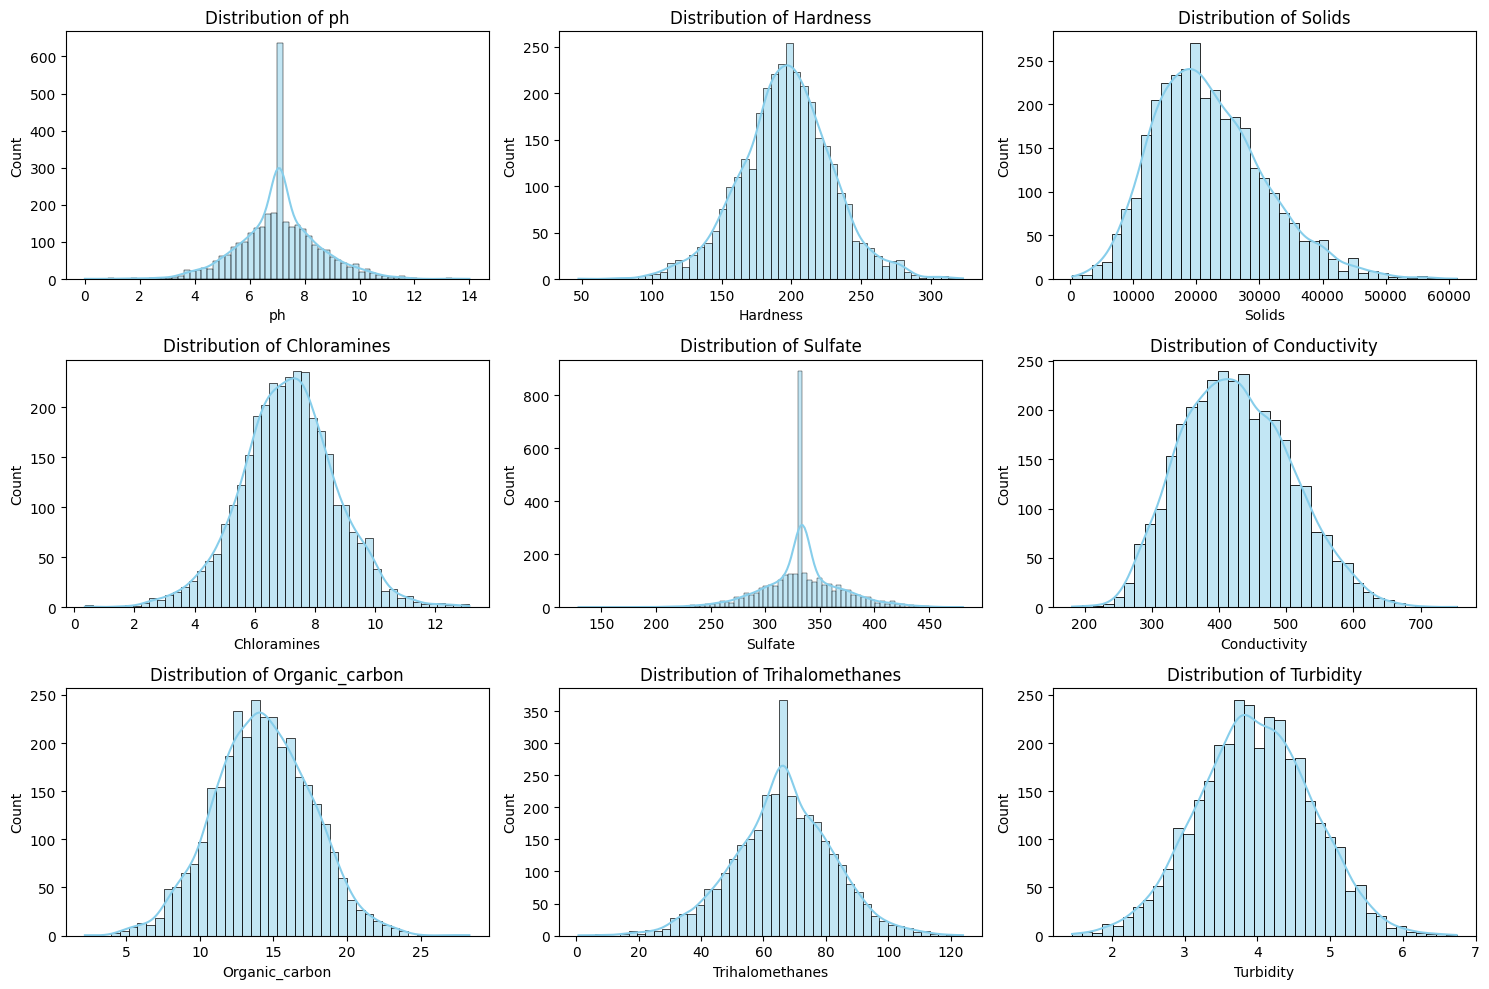

In [33]:
# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

<ipython-input-34-2a47f609188a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Potability', palette='Set2')


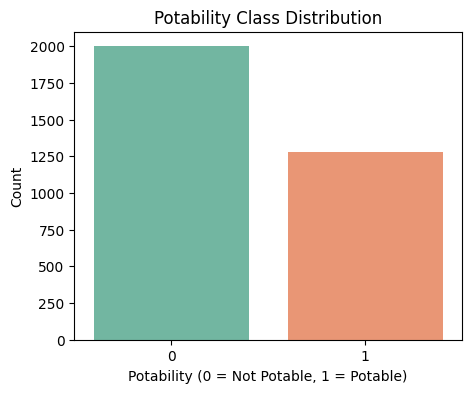

In [34]:
# Count plot for target label (Potability)
plt.figure(figsize=(5, 4))
sns.countplot(data=data, x='Potability', palette='Set2')
plt.title("Potability Class Distribution")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()

In [35]:
# Splitting the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, validation, and test sets (70/15/15)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)  # 0.1765 ≈ 15/(85)

# Show sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2292
Validation set size: 492
Test set size: 492


# Each Memeber Defines their model Here

In [36]:
#Model Definition by member 2
def model_nicolle(X_train):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.regularizers import l2
    from tensorflow.keras.callbacks import EarlyStopping
    from tensorflow.keras.optimizers import RMSprop
    import tensorflow as tf

    # Build model
    model = Sequential([
        Dense(64, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.35),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.35),
        Dense(1, activation='sigmoid')  # Binary classification
    ])

    # Define optimizer
    optimizer = RMSprop(learning_rate=0.0005)

    # Compile model
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    # Early stopping
    early_stop = EarlyStopping(
        monitor='val_accuracy',
        patience=7,
        min_delta=0.01,
        restore_best_weights=True
    )

    return model, early_stop

In [38]:
# Model training
model, early_stop = model_nicolle(X_train)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5272 - loss: 0.7651 - precision_6: 0.3532 - recall_6: 0.2481 - val_accuracy: 0.6118 - val_loss: 0.7303 - val_precision_6: 0.5172 - val_recall_6: 0.0781
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5799 - loss: 0.7362 - precision_6: 0.3912 - recall_6: 0.1518 - val_accuracy: 0.6159 - val_loss: 0.7218 - val_precision_6: 0.5882 - val_recall_6: 0.0521
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5884 - loss: 0.7329 - precision_6: 0.4286 - recall_6: 0.1643 - val_accuracy: 0.6199 - val_loss: 0.7149 - val_precision_6: 0.6923 - val_recall_6: 0.0469
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6099 - loss: 0.7181 - precision_6: 0.4495 - recall_6: 0.1060 - val_accuracy: 0.6220 - val_loss: 0.7093 - val_precision_6: 0.8000 - val_recall_6: 0.0417
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5999 - loss: 0.7057 - precision_6: 0.4528 - recall_6: 0.1200 - val

In [39]:
# Evaluation
train_loss, train_acc, train_prec, train_rec = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=0)

print(f"Train - Acc: {train_acc:.3f}, Precision: {train_prec:.3f}, Recall: {train_rec:.3f}")
print(f"Test  - Acc: {test_acc:.3f}, Precision: {test_prec:.3f}, Recall: {test_rec:.3f}")

Train - Acc: 0.666, Precision: 0.749, Recall: 0.217
Test  - Acc: 0.654, Precision: 0.750, Recall: 0.172


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Accuracy: 0.654
Precision: 0.750
Recall: 0.172
F1 Score: 0.280


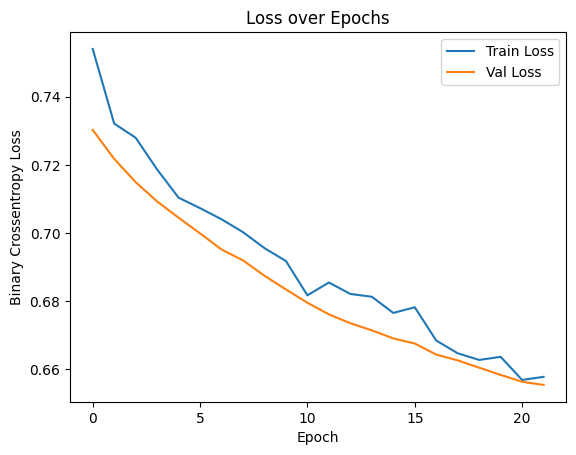

In [41]:
# 6. Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()

In [42]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,508 (21.52 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,755 (10.77 KB)